<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/linreg_torch_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

__Goal__

We will implement a linear regression model using both linear algebra appoach and pytorch neural network.

__linear regression problem__

Given a sequence of input and output pairs 
$$\{(x_i, y_i): i = 1, 2, \ldots, n\}$$
the problem is to find a pair of numbers $(w, b)$ to have a linear function
$$ y = f(x) = wx + b$$
fitting the given data. That is, 
$$(w, b) = \arg\min_{w, b} \sum_i |y_i - f(x_i)|^2.$$

__input and output data cook up__

In [0]:
'''
Create data
'''

batch_size = 50

#Cook data using these param
#Use regression on data to find param back
bias_param = 5.
weight_param = 2.

x_train = torch.linspace(0, batch_size-1, batch_size).reshape(batch_size, 1)
y_train = bias_param + weight_param * x_train
y_train += torch.randn(batch_size,1)*3.0


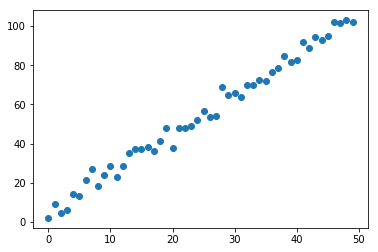

In [3]:
plt.scatter(x_train.numpy(), y_train.numpy())

__Linear Algebra approach__

Set
$$A = \begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix}
$$
and
$$
y = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
.$$
$(w,b)$ can be solved by
$$
A^T A 
\begin{bmatrix}
b\\
w
\end{bmatrix} = A^T y.
$$

In [0]:
A = torch.cat((torch.ones(batch_size,1), x_train), 1)

In [0]:
bw, LU = torch.solve(A.t()@y_train, A.t()@A)
bias = bw[0]
weight = bw[1]

In [0]:
y_pred = bias + weight*x_train

In [7]:
loss_la = nn.MSELoss()
print('>>> loss from linear algebra approach is ' 
      + str(loss_la(y_pred, y_train).numpy()))

>>> loss from linear algebra approach is 10.480418


>>>bias:[4.9024854] and weight:[2.0181904]


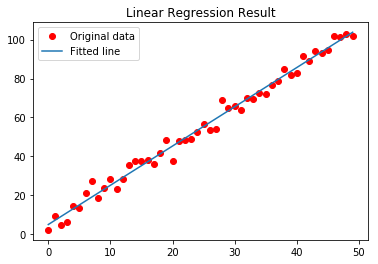

In [8]:
print('>>>bias:'+str(bias.numpy()) 
      +' and weight:'+ str(weight.numpy()))

plt.plot(x_train.numpy(), y_train.numpy(), 
         'ro', label ='Original data')
plt.plot(x_train.numpy(), y_pred.numpy(), 
         label ='Fitted line')

plt.title('Linear Regression Result') 
plt.legend() 
plt.show()

__Torch nn__

We implement linear regression by torch,.nn

Linear regression has three components:

- function space: linear regression is indeed to find the __best__ function in the function space
$$ \mathcal F = 
\{
f(x; w, b) = wx + b| w, b\in \mathbb R^1
\}$$
This can be implemented by nn.linear.

- loss function: By best function among $\mathcal F$, we mean the function which minimize a given loss defined apriori. In this case, the loss function is Mean sequared error, i.e.
$$
l(w,b) = \sum_i |y_i - f(x_i, w, b)|^2
$$
This can be defined by nn.MSELoss

- optimization: 
To minimize the loss function over all $(w,b)$, one shall need a iterative optimization scheme. In this example, we will use stochastic gradient descent implemented by torch.optim.SGD. see [ref](http://proceedings.mlr.press/v28/sutskever13.html)

__nn.Linear__

nn.Linear(input_dim, output_dim) defines a function 
$$f(x, w, b) = x w^T+b$$
where 

- $x \in \mathbb R^{1\times n}$ is the input, where $n$ is equal to input_dim

- $w \in \mathbb R^{m\times n}$ is randomly assigned weight, where $m$ is equal to output_dim

- $b \in \mathbb R^{1\times m}$ is randomly assigned bias.

In [0]:
#experiment for nn.Linear
in_dim = 2
out_dim = 1
model = nn.Linear(in_dim, out_dim)

In [10]:
#print model parameters automatically
for p in model.parameters():
  print(p)

Parameter containing:
tensor([[0.5949, 0.3562]], requires_grad=True)
Parameter containing:
tensor([-0.3227], requires_grad=True)


In [11]:
#print model parameters manually
print('weight is ' + str(model.weight))
print('bias is ' + str(model.bias))

weight is Parameter containing:
tensor([[0.5949, 0.3562]], requires_grad=True)
bias is Parameter containing:
tensor([-0.3227], requires_grad=True)


In [12]:
#one can change parameters
model.weight.data = torch.tensor([[2, -1]])
model.bias.data = torch.tensor([1])
for p in model.parameters():
  print(p)

Parameter containing:
tensor([[ 2, -1]], requires_grad=True)
Parameter containing:
tensor([1], requires_grad=True)


In [13]:
#test computation of linear model defined above

x = torch.tensor([1, 2])
y = model(x)
print(y)

tensor([1], grad_fn=<AddBackward0>)


__nn.MSELoss__

pytorch provides MSELoss to save our work to define a function.
The code below is to demonstrate how it works by comparing with manually created MSE function from the definition.

In [14]:
input_ = torch.randn(3, 2)
target_ = torch.randn(3, 2)

loss = nn.MSELoss()
output_mseloss = loss(input_, target_)
print(output_mseloss.item())

output_my = (target_ - input_).pow(2).mean()
print(output_my.item())

3.4766438007354736
3.4766438007354736


__Implementation of linear regression by pytorch__

In [0]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 10000
learning_rate = 0.001

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [21]:
# Train the model
for epoch in range(num_epochs):

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                    num_epochs, loss.item()))



Epoch [500/10000], Loss: 15.7426
Epoch [1000/10000], Loss: 13.6252
Epoch [1500/10000], Loss: 12.3598
Epoch [2000/10000], Loss: 11.6036
Epoch [2500/10000], Loss: 11.1516
Epoch [3000/10000], Loss: 10.8815
Epoch [3500/10000], Loss: 10.7201
Epoch [4000/10000], Loss: 10.6237
Epoch [4500/10000], Loss: 10.5660
Epoch [5000/10000], Loss: 10.5316
Epoch [5500/10000], Loss: 10.5110
Epoch [6000/10000], Loss: 10.4987
Epoch [6500/10000], Loss: 10.4913
Epoch [7000/10000], Loss: 10.4869
Epoch [7500/10000], Loss: 10.4843
Epoch [8000/10000], Loss: 10.4827
Epoch [8500/10000], Loss: 10.4818
Epoch [9000/10000], Loss: 10.4813
Epoch [9500/10000], Loss: 10.4809
Epoch [10000/10000], Loss: 10.4807


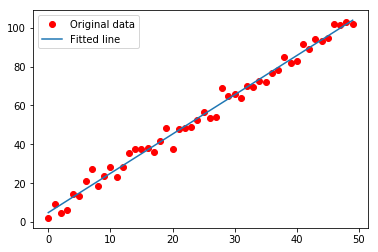

Parameter containing:
tensor([[2.0192]], requires_grad=True)
Parameter containing:
tensor([4.8685], requires_grad=True)


In [22]:
# Plot the graph
#predicted = model(torch.from_numpy(x_train)).detach().numpy()
predicted = model(x_train).detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()

#print model parameters automatically
for p in model.parameters():
  print(p)

In [23]:
print('>>>loss from one layer model is:', criterion(y_pred, y_train).item())

>>>loss from one layer model is: 10.48041820526123


__Q.__ In this below, we deploy two linear layers and it shall do the same job as one-layer network. However, it actually blows up if we use the same lr. why? Actually it works with smaller lr.

In [24]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 30000
learning_rate = 0.00003

# Linear regression model
H = 2

#layer1 = nn.Linear(input_size, H)
#layer2 = nn.Linear(H, output_size)

layer2 = nn.Sequential(
    nn.Linear(input_size, H),
    nn.Linear(H, output_size)
)

#model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(layer2.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):

    # Forward pass
    #out1 = layer1(x_train)
    #outputs = layer2(out1)
    outputs = layer2(x_train)

    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                    num_epochs, loss.item()))

Epoch [1000/30000], Loss: 15.4830
Epoch [2000/30000], Loss: 14.8774
Epoch [3000/30000], Loss: 14.3432
Epoch [4000/30000], Loss: 13.8690
Epoch [5000/30000], Loss: 13.4464
Epoch [6000/30000], Loss: 13.0689
Epoch [7000/30000], Loss: 12.7315
Epoch [8000/30000], Loss: 12.4303
Epoch [9000/30000], Loss: 12.1619
Epoch [10000/30000], Loss: 11.9236
Epoch [11000/30000], Loss: 11.7130
Epoch [12000/30000], Loss: 11.5276
Epoch [13000/30000], Loss: 11.3655
Epoch [14000/30000], Loss: 11.2246
Epoch [15000/30000], Loss: 11.1028
Epoch [16000/30000], Loss: 10.9983
Epoch [17000/30000], Loss: 10.9092
Epoch [18000/30000], Loss: 10.8337
Epoch [19000/30000], Loss: 10.7702
Epoch [20000/30000], Loss: 10.7170
Epoch [21000/30000], Loss: 10.6728
Epoch [22000/30000], Loss: 10.6363
Epoch [23000/30000], Loss: 10.6063
Epoch [24000/30000], Loss: 10.5817
Epoch [25000/30000], Loss: 10.5616
Epoch [26000/30000], Loss: 10.5454
Epoch [27000/30000], Loss: 10.5323
Epoch [28000/30000], Loss: 10.5217
Epoch [29000/30000], Loss: 10